In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    
    response = requests.get(url)

            
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [29]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Worst BA experience. I was supposed to fly out to Italy on 7 September 2023. I arrived at OR Tambo International airport ready to check my bags in (I already checked-in online the previous evening so I had my boarding pass ready). At the counter I was told that I had been off-loaded from the flight as my connecting flight has been cancelled. No information was sent regarding this beforehand. The team at the check-in counter tried to get me on another flight that evening, but there were no flights available. They did manage to get me another flight the following evening with Lufthansa to Italy via Frankfurt. However, I did miss the first part of my trip having arrived a day and a half later than I was supposed to. Upon moving the flights I did ask the BA staff whether my flights back are still valid and that everything is in order, which they assured me is correct. I have to fly back to South Africa on 18 September and upon checking my booking information I noticed on my BA account that my first flight (Milan to London) is just missing from my booking. My connecting from London to Johannesburg is still there. After spending the entire morning on the customer helpline two different operators picked up and in both instances, the moment I proceed to give my booking reference number, my call gets dropped. Currently it seems like I will be arriving at the airport again on Monday without a flight."
1,"✅ Trip Verified | My daughter and I were denied boarding on our business class flight from Madrid to Heathrow in March 25, 2023, the first leg on our return flight to Victoria, Canada. No reason was given for the denied boarding by the check in staff at the British Airways counter in Madrid, who said they were only agents and told us to call British Airways. We were three hours early for the flight and had valid passports. After many tries we finally reached British Airways by phone, but we were told to call Expedia which had booked the flights. Expedia confirmed that we had been bumped from the flight, with no explanation as to why. Expedia then began a long process of finding alternative flights. Over the next 24 hours we had numerous calls with both Expedia and British Airways. Incredibly, the next available flights were 9 days later on April 3. This was almost unbelievable, but after many many tries it was the best we could do. Even though these were Business Class tickets. Part of the problem was that apparently rules did not allow any changes to routing for any segment of the flight. This nine day delay was a major problem for us. I had to miss work and my daughter was missing school. Further, we received no compensation from British Airways, no penalty fee, and not any reimbursement of our expenses for staying the nine extra days. After our return I began the British Airways online complaint process, and submitted all supporting documents. I received an email reply and a case reference number. And then nothing. I sent numerous follow up emails, and received no replies. It is now months later, and still I have not heard from British Airways. This is shocking, and definitely the worst airline service I have received for my thousands of flights over many decades. I am a very patient person and this is the first time I have commented on this type of forum. I think the public should be made aware of extremely poor customer service at British Airways."
2,"✅ Trip Verified | Despite boarding being the usual free for all at LHR with groups 1-3 being called to board all at once. Whilst those passengers who had agreed to check in a bag in at the gate, getting to board before anyone else! However, the service on board was impeccable. Superb crew, friendly, attentive, interacting with passengers and generally appearing to be enjoying their job. Like BA in the old days and at its best. Food choice and quality seems to have improved too (no beef cheeks thankfully) and even the Club kitchen appears to have returned.

In [6]:
df.to_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\ba\\BA_reviews.csv")

In [6]:
df=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\ba\\BA_reviews.csv")

In [7]:
df.head(10)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Worst BA experience. I was s...
1,1,✅ Trip Verified | My daughter and I were deni...
2,2,✅ Trip Verified | Despite boarding being the u...
3,3,"Not Verified | Flight cancelled, no crew! 9th..."
4,4,"Not Verified | The worst service ever, my bag..."
5,5,✅ Trip Verified | 4/4 flights we booked this ...
6,6,✅ Trip Verified | British Airways has a total...
7,7,"✅ Trip Verified | London Heathrow to Keflavik,..."
8,8,✅ Trip Verified | Mumbai to London Heathrow in...
9,9,✅ Trip Verified | Care and support shocking. ...


In [8]:
df.isna().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
import re

In [11]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-z0-9\s]','',text)
    text=" ".join(text.split())
    words=text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [12]:
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
df.columns

Index(['Unnamed: 0', 'reviews', 'cleaned_reviews'], dtype='object')

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [16]:
sentiment_distribution = df['sentiment_category'].value_counts()
print(sentiment_distribution)

sentiment_category
Positive    571
Negative    423
Neutral       6
Name: count, dtype: int64


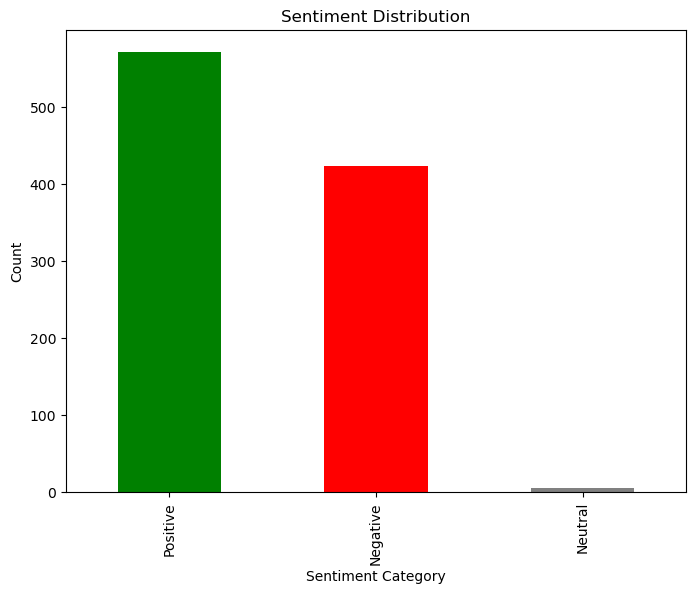

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [18]:
total_reviews = len(df)

positive_percentage = (sentiment_distribution['Positive'] / total_reviews) * 100
negative_percentage = (sentiment_distribution['Negative'] / total_reviews) * 100
neutral_percentage = (sentiment_distribution['Neutral'] / total_reviews) * 100
positive_percentage, negative_percentage, neutral_percentage

(57.099999999999994, 42.3, 0.6)

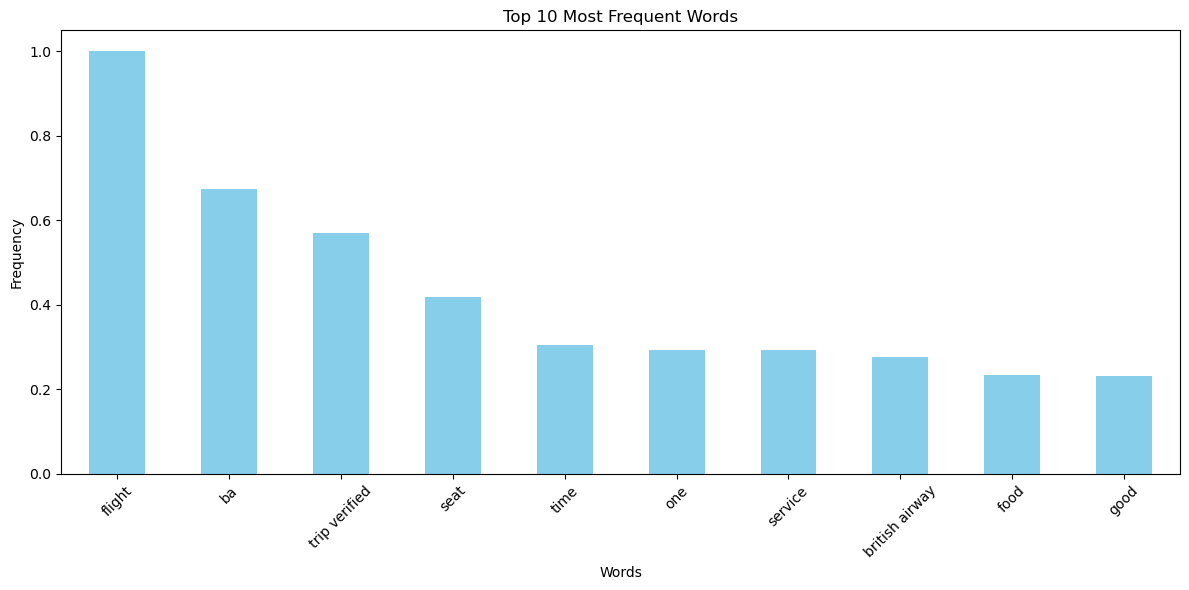

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['cleaned_reviews'])  


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
word_frequencies = wordcloud.words_


word_freq_series = pd.Series(word_frequencies)

top_10_words = word_freq_series.head(10)


plt.figure(figsize=(12, 6))
top_10_words.plot(kind='bar', color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()
